# Linear Regression

#### Linear Regression is the task of predicting the dependent variable based on the given independent variable/s

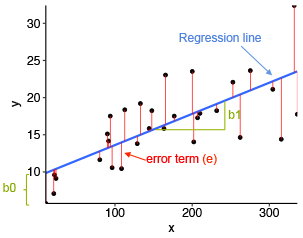

## Simple Linear Regression:

##### it is a method to predict the dependent variable (y) based on the independent variable (x). It is assumed that the two variables are linearly related. Hence, we  try to find the linear function that predicts the response value (y) as accurately as possible as a function of the feature or independent variable (x).

##### y = b0 + b1*x 
##### where y is the dependent variable we are trying to predict, x is the independent variable we are using to make predictions, b0 is the y-intercept, and b1 is the slope of the line.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Creating random number generator
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 4 + rng.randn(50)

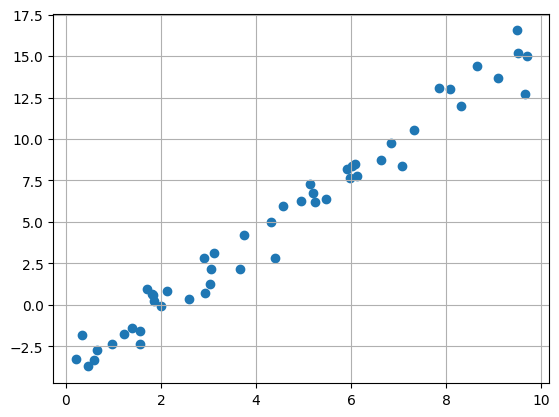

In [53]:
plt.scatter(x, y)
plt.grid(True)

In [54]:
# Importing the linear regression model
from sklearn.linear_model import LinearRegression

In [55]:
X = x[:, np.newaxis]

In [56]:
lr = LinearRegression(fit_intercept=True)

In [57]:
lr.fit(X, y)

LinearRegression()

In [58]:
xfit = np.linspace(0, 10, 1000)
Xfit = xfit[:, np.newaxis]
yfit = lr.predict(Xfit)

In [64]:
# yfit

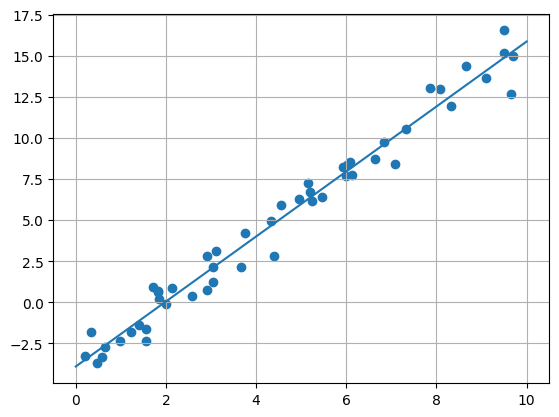

In [60]:
plt.scatter(X, y)
plt.plot(xfit, yfit)
plt.grid(True)

In [62]:
print("Model slope: ", lr.coef_[0])
print("Model intercept: ", lr.intercept_)

Model slope:  1.9776566003853098
Model intercept:  -3.903310725531111
